In [ ]:
import pickle 
import time
import numpy as np
import pandas as pd
from keras.preprocessing import image
import tensorflow as tf
from keras.applications.mobilenet import preprocess_input, decode_predictions
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import merge, Input
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

In [ ]:
pickle_in_features = open('/content/drive/MyDrive/pkl-files/features.pkl', 'rb')
x = pickle.load(pickle_in_features)
x = np.array(x, dtype=np.float64)

pickle_in_labels = open('/content/drive/MyDrive/pkl-files/labels.pkl', 'rb')
y = pickle.load(pickle_in_labels)
y = np.array(y, dtype=np.int64)
y = to_categorical(y)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=2)

print(x_train.shape)
print(y_train.shape)

(2105, 224, 224, 3)
(2105, 3)


In [ ]:
mn_model = MobileNet(weights='imagenet')
mn_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
classes = 3

image_input = Input(shape=(224, 224, 3))

model = MobileNet(input_tensor=image_input, include_top=True, weights='imagenet')

last_layer = model.output
x = Flatten(name='flatten')(last_layer)
out = Dense(classes, activation='softmax', name='output')(last_layer)
custom_mobilenet_model = Model(image_input, out)
custom_mobilenet_model.summary()


print(image_input.shape)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
for layer in custom_mobilenet_model.layers[:-1]:
    layer.trainable = False

custom_mobilenet_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

t=time.time()
hist = custom_mobilenet_model.fit(x_train, y_train, batch_size=32, epochs=20, verbose=2, validation_split=0.2)

print('Training time: %s' % (t - time.time()))

Epoch 1/20
53/53 - 15s - loss: 1.0846 - accuracy: 0.5796 - val_loss: 1.0753 - val_accuracy: 0.6722 - 15s/epoch - 287ms/step
Epoch 2/20
53/53 - 2s - loss: 1.0642 - accuracy: 0.7191 - val_loss: 1.0571 - val_accuracy: 0.7411 - 2s/epoch - 45ms/step
Epoch 3/20
53/53 - 2s - loss: 1.0442 - accuracy: 0.7601 - val_loss: 1.0392 - val_accuracy: 0.7482 - 2s/epoch - 45ms/step
Epoch 4/20
53/53 - 2s - loss: 1.0252 - accuracy: 0.7654 - val_loss: 1.0224 - val_accuracy: 0.7435 - 2s/epoch - 45ms/step
Epoch 5/20
53/53 - 2s - loss: 1.0068 - accuracy: 0.7797 - val_loss: 1.0057 - val_accuracy: 0.7530 - 2s/epoch - 45ms/step
Epoch 6/20
53/53 - 2s - loss: 0.9890 - accuracy: 0.7803 - val_loss: 0.9896 - val_accuracy: 0.7577 - 2s/epoch - 46ms/step
Epoch 7/20
53/53 - 2s - loss: 0.9720 - accuracy: 0.7850 - val_loss: 0.9742 - val_accuracy: 0.7577 - 2s/epoch - 46ms/step
Epoch 8/20
53/53 - 2s - loss: 0.9555 - accuracy: 0.7862 - val_loss: 0.9596 - val_accuracy: 0.7553 - 2s/epoch - 45ms/step
Epoch 9/20
53/53 - 2s - loss:

In [ ]:
(loss, accuracy) = custom_mobilenet_model.evaluate(x_test, y_test , batch_size=10, verbose=2)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

91/91 - 2s - loss: 0.8095 - accuracy: 0.7774 - 2s/epoch - 22ms/step
[INFO] loss=0.8095, accuracy: 77.7409%


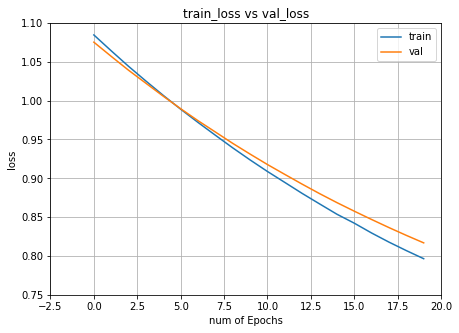

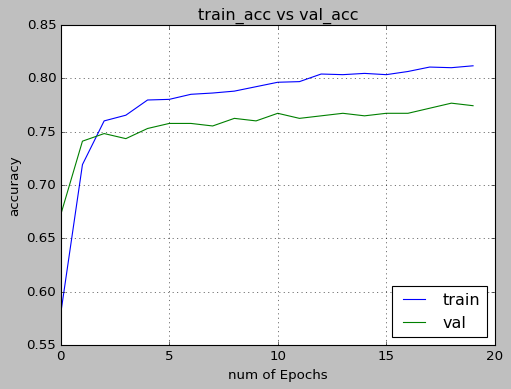

In [ ]:
import matplotlib.pyplot as plt

train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(20)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
plt.style.use(['classic'])